<a href="https://colab.research.google.com/github/sauravkumar19/Coronavirus-Tweet-Sentiment-Analysis/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
netflix_data = df.copy()

In [5]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
def remove_nan_value(df,th = 80.0):
  
  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step2
  duplicates = len(df[df.duplicated()])
  print('Duplicate value present in data is', duplicates)
  df.drop_duplicates(inplace=True,ignore_index=True)

  numeric_column = df.describe().columns
  cateogorical_column = df.describe(include = 'object').columns

  for item in null_percentage.iteritems():
    if (item[0] in cateogorical_column) and (item[1] != 0):
      frequency = df[item[0]].value_counts().sort_values(ascending = False)
      if frequency[0]/len(df) > 0.3:
        df[item[0]].fillna(frequency.index[0], inplace = True)
      else:
        df[item[0]].fillna('other',inplace = True)

    if (item[0] in numeric_column) and (item[1] != 0):
      df[item[0]].fillna(df[item[0]].mean(), inplace = True)

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)  

In [9]:
remove_nan_value(netflix_data)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
show_id         0.000000
type            0.000000
title           0.000000
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
Duplicate value present in data is 0
show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


## EDA

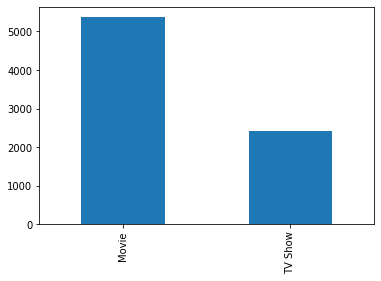

In [10]:
netflix_data['type'].value_counts().plot(kind = 'bar')

In [11]:
shows_movie = netflix_data.groupby('release_year')['type'].value_counts().unstack()
shows_movie.fillna(0,inplace = True)
shows_movie

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2017,744.0,268.0
2018,734.0,387.0
2019,582.0,414.0


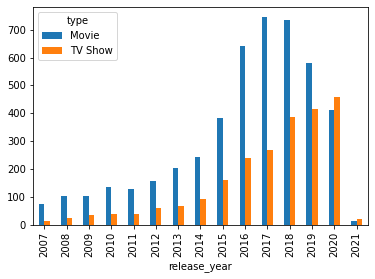

In [12]:
shows_movie.tail(15).plot(kind = 'bar')

In [13]:
movie_rate = netflix_data.groupby('rating')['type'].value_counts().unstack()
movie_rate.fillna(0,inplace = True)
movie_rate

type,Movie,TV Show
rating,,
G,39.0,0.0
NC-17,3.0,0.0
NR,79.0,5.0
PG,247.0,0.0
PG-13,386.0,0.0
R,663.0,2.0
TV-14,1272.0,659.0
TV-G,111.0,83.0
TV-MA,1850.0,1020.0


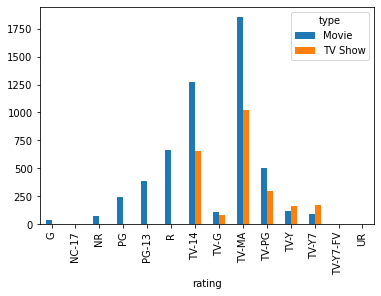

In [14]:
movie_rate.plot(kind = 'bar')

In [15]:
country_wise_rating = netflix_data[['country','rating']]

In [16]:
country_wise_rating

,country,rating
0,Brazil,TV-MA
1,Mexico,TV-MA
2,Singapore,R
3,United States,PG-13
4,United States,PG-13
...,...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA
7783,India,TV-14
7784,United States,TV-MA
7785,Australia,TV-PG


In [17]:
country_wise_rating['country'] = country_wise_rating['country'].apply(lambda x: x.split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
country_wise_rating = country_wise_rating.explode('country')

In [19]:
country_wise_rating

,country,rating
0,Brazil,TV-MA
1,Mexico,TV-MA
2,Singapore,R
3,United States,PG-13
4,United States,PG-13
...,...,...
7784,United States,TV-MA
7785,Australia,TV-PG
7786,United Kingdom,TV-MA
7786,Canada,TV-MA


In [20]:
rate = country_wise_rating.groupby('country')['rating'].value_counts().unstack()
rate.fillna(0, inplace=True)
rate

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0
Venezuela,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [21]:
total_rate = country_wise_rating.groupby('country')['rating'].size()
total_rate

country
                4
 Afghanistan    1
 Albania        1
 Algeria        2
 Angola         1
               ..
Uruguay         9
Venezuela       2
Vietnam         5
West Germany    1
Zimbabwe        1
Name: rating, Length: 188, dtype: int64

In [22]:
t1 = rate.merge(total_rate, how = 'left', on = 'country').sort_values(by = 'rating', ascending= False).head(10)

In [23]:
column = t1.columns.drop('rating')

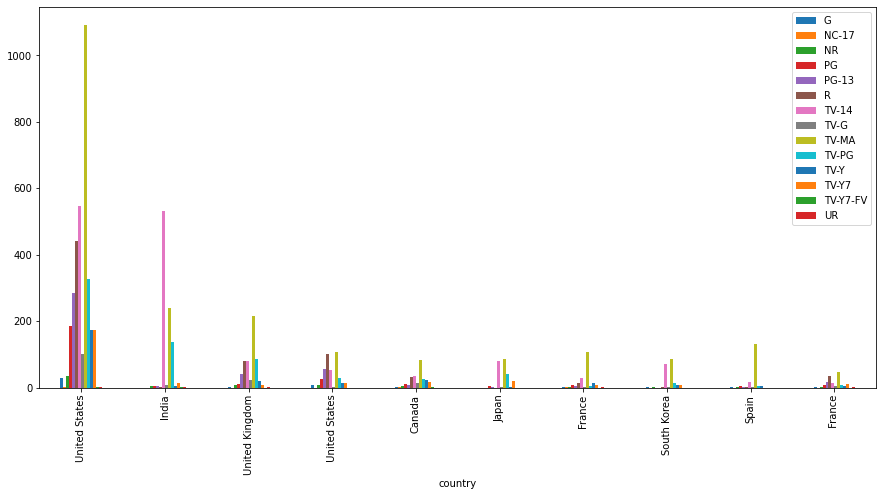

In [24]:
t1.plot(kind = 'bar', y = column, figsize = (15,7))

In [26]:
def explode_column(column):
  ''' pass the series'''
  

In [26]:
netflix_data['month'] = netflix_data['date_added'].apply(lambda x: x.split()[0])
netflix_data['min and season'] = netflix_data['duration'].apply(lambda x: x.split()[0])

In [27]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,min and season
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,93
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,78
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,80
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,123


In [28]:
features = ['type','cast','country','rating','listed_in','month','min and season']
cast_table = netflix_data[features]
cast_table

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,4
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",December,93
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies",December,78
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",November,80
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,January,123
...,...,...,...,...,...,...,...
7782,Movie,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA,"Dramas, International Movies",October,99
7783,Movie,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,TV-14,"Dramas, International Movies, Music & Musicals",March,111
7784,Movie,Nasty C,United States,TV-MA,"Documentaries, International Movies, Music & M...",September,44
7785,TV Show,"Adriano Zumbo, Rachel Khoo",Australia,TV-PG,"International TV Shows, Reality TV",October,1


In [42]:
cast = netflix_data['cast'].apply(lambda x : x.split(','))
cast

0       [João Miguel,  Bianca Comparato,  Michel Gomes...
1       [Demián Bichir,  Héctor Bonilla,  Oscar Serran...
2       [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...
3       [Elijah Wood,  John C. Reilly,  Jennifer Conne...
4       [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...
                              ...                        
7782    [Imad Creidi,  Antoinette Turk,  Elias Gergi, ...
7783    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
7784                                            [Nasty C]
7785                        [Adriano Zumbo,  Rachel Khoo]
7786                                              [other]
Name: cast, Length: 7787, dtype: object

In [43]:
cast.explode().value_counts().sort_values(ascending = False)

other                     718
 Anupam Kher               38
 Takahiro Sakurai          28
Shah Rukh Khan             27
 Om Puri                   27
                         ... 
 Gustav Dyekjaer Giese      1
 Jon Lange                  1
 Allan Hyde                 1
 Johannes Lassen            1
 Rachel Khoo                1
Name: cast, Length: 35373, dtype: int64

In [50]:
for i in ['cast','listed_in']:
  cast_table[i] = cast_table[i].apply(lambda x: x.split(','))
  cast_table = cast_table.explode(i)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
cast_table

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International TV Shows,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Dramas,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Sci-Fi & Fantasy,August,4
0,TV Show,Bianca Comparato,Brazil,TV-MA,International TV Shows,August,4
0,TV Show,Bianca Comparato,Brazil,TV-MA,TV Dramas,August,4
...,...,...,...,...,...,...,...
7785,TV Show,Adriano Zumbo,Australia,TV-PG,Reality TV,October,1
7785,TV Show,Rachel Khoo,Australia,TV-PG,International TV Shows,October,1
7785,TV Show,Rachel Khoo,Australia,TV-PG,Reality TV,October,1
7786,Movie,other,"United Kingdom, Canada, United States",TV-MA,Documentaries,March,90


In [52]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split('&'))

In [53]:
cast_table = cast_table.explode('listed_in')

In [46]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split()[0] if x.split()[0] != 'TV' else x.split()[1])

In [55]:
cast_table

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International TV Shows,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Dramas,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Sci-Fi,August,4
0,TV Show,João Miguel,Brazil,TV-MA,Fantasy,August,4
0,TV Show,Bianca Comparato,Brazil,TV-MA,International TV Shows,August,4
...,...,...,...,...,...,...,...
7785,TV Show,Rachel Khoo,Australia,TV-PG,International TV Shows,October,1
7785,TV Show,Rachel Khoo,Australia,TV-PG,Reality TV,October,1
7786,Movie,other,"United Kingdom, Canada, United States",TV-MA,Documentaries,March,90
7786,Movie,other,"United Kingdom, Canada, United States",TV-MA,Music,March,90


In [89]:
cast_genre = cast_table.groupby('cast')['listed_in'].value_counts()
# cast_genre.fillna(0)

In [90]:
actors = cast_table['cast'].unique()

In [105]:
cast_genre['João Miguel'].to_dict()

{' Fantasy': 1, ' TV Dramas': 1, ' TV Sci-Fi ': 1, 'International TV Shows': 1}

In [102]:
cast_genre_dict = {}
for items in actors:
  cast_tuple = cast_genre[items].to_dict()
  cast_genre_dict[items] = cast_tuple



In [122]:
cast_genre = pd.Series(cast_genre_dict)
cast_genre.index.name = 'cast'
cast_genre.name = 'genre'
cast_genre

cast
João Miguel               {' Fantasy': 1, ' TV Dramas': 1, ' TV Sci-Fi '...
 Bianca Comparato         {' Dramas': 1, ' Fantasy': 1, ' International ...
 Michel Gomes             {' Fantasy': 1, ' TV Dramas': 1, ' TV Sci-Fi '...
 Rodolfo Valente          {' Fantasy': 1, ' TV Dramas': 1, ' TV Sci-Fi '...
 Vaneza Oliveira          {' Fantasy': 1, ' TV Dramas': 1, ' TV Sci-Fi '...
                                                ...                        
 Anita Shabdish           {' International Movies': 1, ' Music ': 1, ' M...
 Chittaranjan Tripathy    {' International Movies': 1, ' Music ': 1, ' M...
Nasty C                   {' International Movies': 1, ' Music ': 1, ' M...
Adriano Zumbo               {' Reality TV': 1, 'International TV Shows': 1}
 Rachel Khoo                {' Reality TV': 1, 'International TV Shows': 1}
Name: genre, Length: 35373, dtype: object

In [123]:
cast_total_genre = cast_table.groupby('cast')['listed_in'].size()
cast_total_genre

cast
  Jr.                     2
 "Riley" Lakdhar Dridi    3
 'Najite Dede             3
 2 Chainz                 1
 50 Cent                  8
                         ..
İbrahim Büyükak           2
İbrahim Çelikkol          3
Şahin Irmak               3
Şükrü Özyıldız            3
Ṣọpẹ́ Dìrísù              2
Name: listed_in, Length: 35373, dtype: int64

In [127]:
t2 = pd.merge(cast_genre,cast_total_genre, how ='inner',on ='cast').sort_values(by = 'listed_in',ascending = False).head(10)

In [128]:
t2

,genre,listed_in
cast,,
other,"{'Documentaries': 365, ' International Movies'...",1415
Anupam Kher,"{' International Movies': 32, ' Dramas': 14, '...",125
Shah Rukh Khan,"{' International Movies': 23, ' Dramas': 14, '...",90
Om Puri,"{' International Movies': 22, 'Dramas': 9, ' A...",83
Boman Irani,"{' International Movies': 21, ' Dramas': 11, '...",80
Akshay Kumar,"{' International Movies': 19, 'Comedies': 9, '...",76
Paresh Rawal,"{' International Movies': 21, 'Comedies': 12, ...",75
Takahiro Sakurai,"{'Anime Series': 21, ' International TV Shows'...",70
Yuki Kaji,"{' International TV Shows': 14, 'Anime Series'...",69


In [116]:
column = t2.columns
column = t2.columns.drop('listed_in_y')

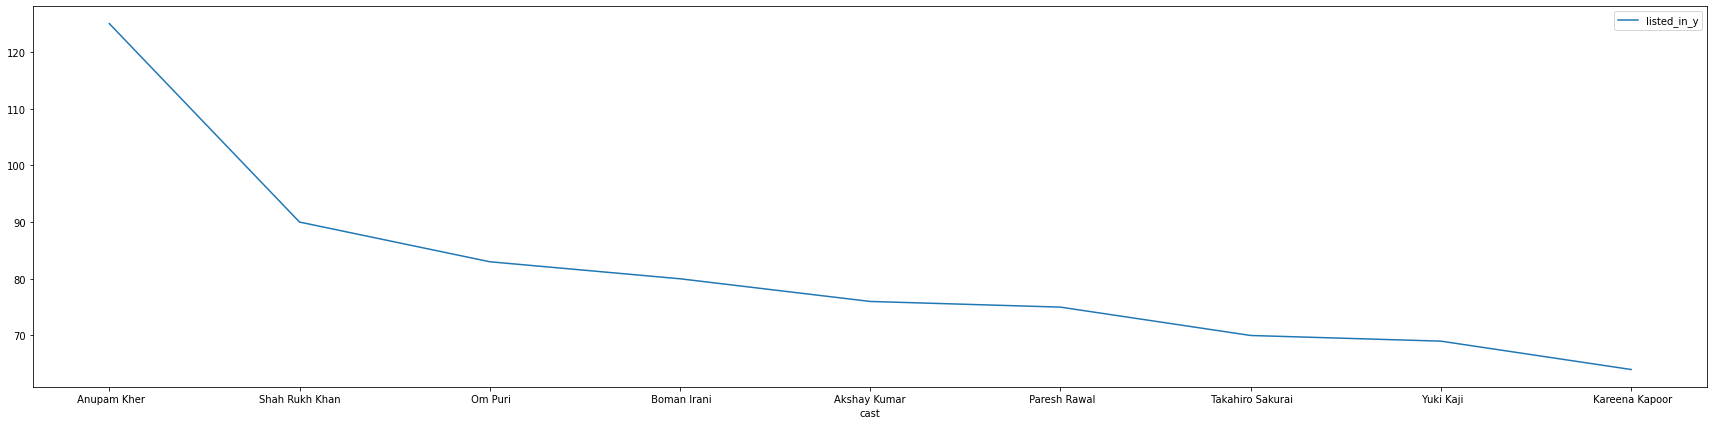

In [118]:
t2[1:].plot(figsize = (30,7))